# Hinweise zur Kreuzkorrelation
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->


Eine Verschiebung zweier Signale $a(t)$ und $b(t)$ lässt sich mithilfe der [Kreuzkorrelation](https://de.wikipedia.org/wiki/Kreuzkorrelation) der beiden Signale bestimmen.
Diese ist definiert über:
$$
(a \star b)(\tau)\ \overset{\text{Def}}{=} \int_{-\infty}^{\infty} a^*(t)\,b(t+\tau)\,\mathrm{d}t
$$

Das bedeutet, dass für eine beliebige Verschiebung des Signals $b$ um $\tau$ die Funktionswerte multipliziert und dann aufintegriert werden.
Entspricht $\tau$ gerade der tatsächlichen Verzögerung des Signals, ergibt sich ein Maximum.
Eine diskrete Kreuzkorrelation lässt sich mit der Funktion [*correlate()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) aus dem Paket *scipy.signal* berechnen.
Dieses Notebook demonstriert dies anhand eines Rauschsignals, das verschoben wurde.

Zunächst einige Imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

Wir definieren die Länge des Signals sowie die Verschiebung:

In [2]:
num = 200
shift = 15

Nun generieren wir das Rauschsignal und speichern es in einem Array `sig1`:

In [3]:
# Zufallsgenerator wiederholbar initiieren
np.random.seed(3)
# Definiere ein zufälliges Signal (normalverteilte Zufallszahlen)
sig1 = np.random.randn(num)

Wir erstellen nun ein neues Signal, das dem ursprünglichen, lediglich um `shift` Positionen verschobenen Signal entspricht. 
Dies wird mit der [*roll()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.roll.html)-Funktion realisiert. 
Übers Ende "herausgeschobene" Elemente werden dadurch wieder vorne angehängt (das ist hier aber nicht von Bedeutung).

In [4]:
sig2 = np.roll(sig1, shift)

Aus dem ursprünglichen Signal wird nun ein 50 Samples langer Unterbereich definiert, der gesucht werden soll:

In [5]:
ii0 = 75
ii1 = ii0+50
interrogation = sig1[ii0:ii1]

Nun holen wir aus dem *verschobenen* Array einen Unterbereich, in dem gesucht werden soll. 
Dieses Sub-Array ist 60 Samples größer als der zu suchende Bereich (nach vorn und hinten jeweils 30) – wir gehen davon aus, dass wir unseren Signalausschnitt `interrogation` irgendwo darin finden:

In [6]:
is0 = ii0-30
is1 = ii1+30
search = sig2[is0:is1]

Wir plotten die Signale sowie die ausgewählten Unterbereiche (stärkere Linien):

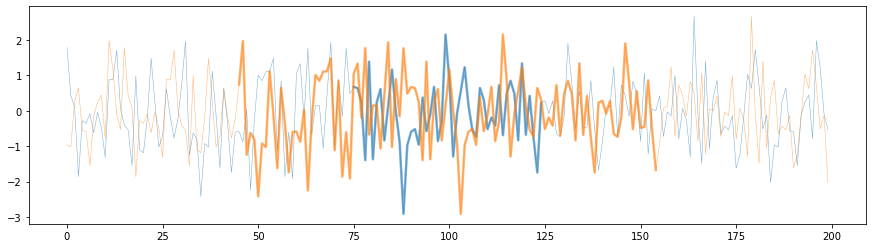

In [7]:
x = np.arange(num)

plt.figure(1,(15,4))

plt.plot(x,sig1,c='C0',lw=0.5,alpha=0.6)
plt.plot(x[ii0:ii1],interrogation,c='C0',lw=2.5,alpha=0.6, label='sig1/interrogation')

plt.plot(x,sig2,c='C1',lw=0.5,alpha=0.6)
plt.plot(x[is0:is1],search,c='C1',lw=2.5,alpha=0.6, label='sig2/search')

plt.show()

Nun wird die Kreuzkorrelationsfunktion berechnet und geplottet:

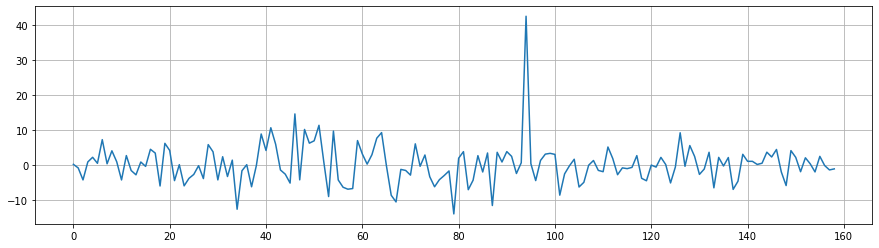

In [8]:
corr = signal.correlate(search, interrogation)#, mode = 'valid')
plt.figure(2,(15,4))

plt.plot(corr)
plt.grid(True)
plt.show()

Das Maximum ist deutlich sichtbar, aber an welcher Position im Korrelations-Array liegt es und was bedeutet das?

In [9]:
maxpos = np.argmax(corr)
print('Position des Maximums im Array: ', maxpos)
print('Länge des Ergebnisses der Kreuzkorrelation: ',len(corr))
print('Länge des Arrays "interrogation": ',len(interrogation))
print('Länge des Arrays "search": ',len(search))

Position des Maximums im Array:  94
Länge des Ergebnisses der Kreuzkorrelation:  159
Länge des Arrays "interrogation":  50
Länge des Arrays "search":  110


Offenbar ist das Ergebnisarray so groß wie die beiden miteinander kreuz-korrelierten Arrays zusammen, abzüglich eines Eintrags.
Der Aufruf von `correlate(search, interrogation)` "schiebt" das Array `interrogation` sukzessive (von links nach rechts) über das Array `search`, 
multipliziert für jeden Schritt die Werte elementweise und summiert das Ergebnis.
Da sich mindestens ein Element überlappen muss, ist das Ergebnisarray um ein Element kürzer als die Summe beider Ausgangsarrays.
*Übrigens: Um für die Berechnung immer mit gleich großen Arrays zu arbeiten, werden den Arrays dort, wo sie nicht überlappen, Nullen angehängt. 
Dieses Vorgehen wir auch als Zero-Padding bezeichnet.*

In den obigen Signalen `sig1` und `sig2` waren die Subarrays `interrogation` und `search` zentriert.
Davon weiß die *correlate()*-Funktion jedoch nichts. 
Deshalb ziehen wir den Versatz beider Arrays ("Überlappung eines Elements" zu "Arrays miteinander zentriert") von der Position des Maximums ab:

In [ ]:
versatz = (len(search)+len(interrogation))//2-1
print('Verschiebung der ursprünglichen Signale: ',maxpos-versatz)

**Wie und warum ändert sich das Ergebnis, wenn Sie beim Aufruf der _correlate2d()_-Funktion den Parameter `mode='valid'` setzen?**

**Achtung:** Das Ausgangssignal beinhaltet Werte, die um den Mittelwert 0 schwanken:

In [ ]:
print('Mittelwert:',np.mean(sig1))
print('Standardabweichung:',np.std(sig1))

**Untersuchen Sie, wie sich die Ergebnisse ändern, wenn Sie auf das Rauschsignal einen Gleichanteil von $10$ addieren.**